In [1]:
%matplotlib inline

In [2]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as DT

conn = pymysql.connect(host='localhost',
                       user='test_user',
                       password='test_password',
                       db ='daviesDB')

In [3]:
frontend_users_df = pd.read_sql(
                        'SELECT * FROM frontend_users', conn)

In [4]:
frontend_users_df.head()

,id,title,email,birthday,city,country,magazin,newsletter,bonuspoints,created,invited_by_frontend_user_id
0,2,Mrs,user_65991@mail.com,1976-03-24,Hanover,DE,0,1,3295,2015-08-11 14:42:43,NaN
1,4,Mr,user_36039@gmail.com,1975-07-05,Dresden,DE,0,1,500,2015-08-12 09:42:15,NaN
2,5,Mrs,user_90819@mail.com,1986-03-07,Bielefeld,DE,0,1,1100,2015-08-12 11:02:26,NaN
3,6,Mrs,user_1227@yahoo.com,1992-04-02,Neuss,DE,0,1,650,2015-08-12 11:11:07,NaN
4,7,Mrs,user_5940@yahoo.com,1984-09-17,Herne,DE,0,0,1770,2015-08-12 14:27:41,NaN


In [5]:
frontend_users_df['birthday'] = pd.to_datetime(frontend_users_df['birthday'], errors = 'coerce')

Converting DoB to Age

In [6]:
now = pd.Timestamp(DT.datetime.now())
frontend_users_df['birthday'] = pd.to_datetime(frontend_users_df['birthday'], format = '%m%d%y')
frontend_users_df['birthday'] = frontend_users_df['birthday'].where(frontend_users_df['birthday'] < now, frontend_users_df['birthday'] -  np.timedelta64(100, 'Y'))
frontend_users_df['birthday'] = (now - frontend_users_df['birthday']).astype('<m8[Y]')
frontend_users_df.rename(columns={'birthday':'age'}, inplace=True)
frontend_users_df.head()

,id,title,email,age,city,country,magazin,newsletter,bonuspoints,created,invited_by_frontend_user_id
0,2,Mrs,user_65991@mail.com,42.0,Hanover,DE,0,1,3295,2015-08-11 14:42:43,NaN
1,4,Mr,user_36039@gmail.com,42.0,Dresden,DE,0,1,500,2015-08-12 09:42:15,NaN
2,5,Mrs,user_90819@mail.com,32.0,Bielefeld,DE,0,1,1100,2015-08-12 11:02:26,NaN
3,6,Mrs,user_1227@yahoo.com,26.0,Neuss,DE,0,1,650,2015-08-12 11:11:07,NaN
4,7,Mrs,user_5940@yahoo.com,33.0,Herne,DE,0,0,1770,2015-08-12 14:27:41,NaN


In [7]:
frontend_users_df['title'].unique()

array(['Mrs', 'Mr'], dtype=object)

Encoding categorical variables - Mrs -> 0, Mr -> 1

In [8]:
frontend_users_df.title.replace(('Mrs', 'Mr'), (0, 1), inplace=True)

In [9]:
frontend_users_df.head()

,id,title,email,age,city,country,magazin,newsletter,bonuspoints,created,invited_by_frontend_user_id
0,2,0,user_65991@mail.com,42.0,Hanover,DE,0,1,3295,2015-08-11 14:42:43,NaN
1,4,1,user_36039@gmail.com,42.0,Dresden,DE,0,1,500,2015-08-12 09:42:15,NaN
2,5,0,user_90819@mail.com,32.0,Bielefeld,DE,0,1,1100,2015-08-12 11:02:26,NaN
3,6,0,user_1227@yahoo.com,26.0,Neuss,DE,0,1,650,2015-08-12 11:11:07,NaN
4,7,0,user_5940@yahoo.com,33.0,Herne,DE,0,0,1770,2015-08-12 14:27:41,NaN


Checking is thete any null values

In [10]:
frontend_users_df.isnull().sum()

id                                  0
title                               0
email                               0
age                                 1
city                                0
country                             0
magazin                             0
newsletter                          0
bonuspoints                         0
created                             0
invited_by_frontend_user_id    117303
dtype: int64

In [11]:
frontend_users_df['age'] = frontend_users_df['age'].fillna(frontend_users_df['age'].mean())

In [12]:
correlation_matrix = frontend_users_df.corr(method='pearson')


From matrix of correlations, we see that there is no strong correlaton between any of variables.

In [13]:
correlation_matrix

,id,title,age,magazin,newsletter,bonuspoints,invited_by_frontend_user_id
id,1.000000,0.048877,-0.043003,NaN,-0.041337,-0.308726,0.456466
title,0.048877,1.000000,0.120707,NaN,-0.043219,-0.060314,0.079163
age,-0.043003,0.120707,1.000000,NaN,0.197901,0.092864,-0.033278
magazin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
newsletter,-0.041337,-0.043219,0.197901,NaN,1.000000,0.269926,0.040959
bonuspoints,-0.308726,-0.060314,0.092864,NaN,0.269926,1.000000,-0.147839
invited_by_frontend_user_id,0.456466,0.079163,-0.033278,NaN,0.040959,-0.147839,1.000000


In [14]:
frontend_users_df.describe()

,id,title,age,magazin,newsletter,bonuspoints,invited_by_frontend_user_id
count,119852.000000,119852.000000,119852.000000,119852.0,119852.000000,119852.000000,2549.000000
mean,65944.527150,0.082644,37.607947,0.0,0.541710,665.850132,27697.896822
std,38918.732454,0.275344,12.502071,0.0,0.498259,944.300682,24107.862140
min,2.000000,0.000000,18.000000,0.0,0.000000,-2210.000000,2.000000
25%,31911.750000,0.000000,28.000000,0.0,0.000000,200.000000,22148.000000
50%,65711.500000,0.000000,35.000000,0.0,1.000000,350.000000,22148.000000
75%,99662.250000,0.000000,46.000000,0.0,1.000000,700.000000,22148.000000
max,133816.000000,1.000000,117.000000,0.0,1.000000,12490.000000,130274.000000


From histogram bellow, we see that there is a lot more women than men

Title Histogram
Men count: 9905
Woman count: 109947


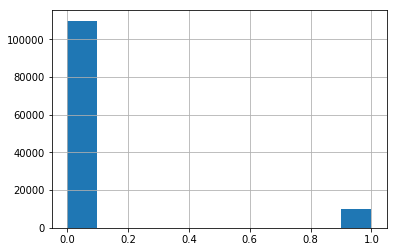

In [15]:
frontend_users_df['title'].hist()
men_count = frontend_users_df['title'].sum()
women_count = frontend_users_df['title'].shape[0] - men_count
print('Title Histogram')
print('Men count: {}'.format(men_count))
print('Woman count: {}'.format(women_count))

From Age Histogram we see, that most of the users are something between 30 and 38 years old.

Age Histogram
Youngest user is 18 years old
Oldest user is 117 years old


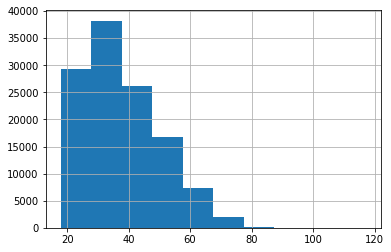

In [16]:
frontend_users_df['age'].hist()
print('Age Histogram')
print("Youngest user is {} years old".format(int(frontend_users_df['age'].min())))
print("Oldest user is {} years old".format(int(frontend_users_df['age'].max())))

From Magazin Histogram we see that there is no user subsribed to magazine

Magazin Histogram


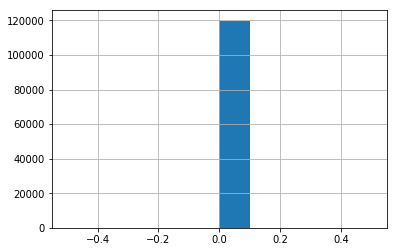

In [17]:
frontend_users_df['magazin'].hist()
print('Magazin Histogram')

64925 users use newsletter


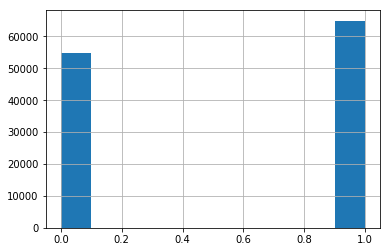

In [18]:
frontend_users_df['newsletter'].hist()
use_newsletter = frontend_users_df['newsletter'].sum()
print('{} users use newsletter'.format(use_newsletter))

Bonus points histogram


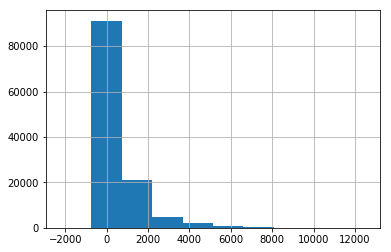

In [19]:
frontend_users_df['bonuspoints'].hist()
print('Bonus points histogram')

We see that all users come from Germany

In [20]:
country_count = frontend_users_df['country'].unique()
cities = frontend_users_df['city'].unique()
print(country_count)

['DE']


In [21]:
print('Users comes from {} different cities'.format(cities.size))

Users comes from 79 different cities


List of all cities

In [22]:
cities

array(['Hanover', 'Dresden', 'Bielefeld', 'Neuss', 'Herne', 'Wiesbaden',
       'Mülheim an der Ruhr', 'Göttingen', 'Erfurt', 'Bottrop',
       'Wolfsburg', 'Gelsenkirchen', 'Potsdam', 'Remscheid', 'Moers',
       'Hildesheim', 'Hamburg', 'Duisburg', 'Reutlingen', 'Augsburg',
       'Offenbach', 'Oldenburg', 'Salzgitter', 'Mönchengladbach',
       'Paderborn', 'Oberhausen', 'Bochum', 'Heidelberg', 'Bonn',
       'Koblenz', 'Darmstadt', 'Kiel', 'Heilbronn', 'Recklinghausen',
       'Bergisch Gladbach', 'Magdeburg', 'Munich', 'Bremen', 'Leipzig',
       'Nuremberg', 'Essen', 'Cologne', 'Jena', 'Krefeld', 'Halle',
       'Fürth', 'Münster', 'Braunschweig', 'Osnabrück', 'Dortmund',
       'Pforzheim', 'Chemnitz', 'Solingen', 'Trier',
       'Ludwigshafen am Rhein', 'Hamm', 'Stuttgart', 'Rostock',
       'Leverkusen', 'Mannheim', 'Lübeck', 'Freiburg im Breisgau', 'Ulm',
       'Bremerhaven', 'Karlsruh', 'Hagen', 'Aachen', 'Erlangen',
       'Saarbrücken', 'Siegen', 'Kassel', 'Berlin', 'Düss

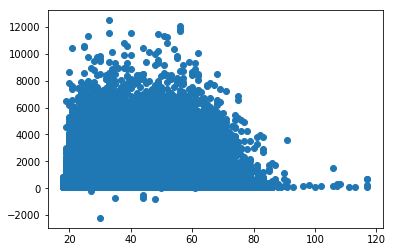

In [23]:
plt.scatter(frontend_users_df['age'].values, frontend_users_df['bonuspoints'].values)

In [24]:
title_bonus_points = frontend_users_df.iloc[:, [1,8]].values
age = frontend_users_df.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(title_bonus_points,age,test_size=0.3,random_state=42)

In [25]:
frontend_users_df.columns

Index(['id', 'title', 'email', 'age', 'city', 'country', 'magazin',
       'newsletter', 'bonuspoints', 'created', 'invited_by_frontend_user_id'],
      dtype='object')

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import explained_variance_score, mean_absolute_error

In [27]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Decision Tree Regressor', DecisionTreeRegressor()))
models.append(('Extra Tree Regressor', ExtraTreesRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))

In [28]:
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{}: ({}) ({})".format(name, score, mae)
    print(msg)

Linear Regression: (0.027264872090449033) (10.118284326107101)
Ridge Regression: (0.027264507508542035) (10.118289291571779)
Lasso Regression: (0.009575267093108852) (10.211230785155259)
ElasticNet: (0.009575791171287484) (10.211216899210909)
Decision Tree Regressor: (0.025871789258677058) (10.085218337440054)
Extra Tree Regressor: (0.026659372348161514) (10.08447341860532)
RandomForestRegressor: (0.030096622505446313) (10.071206674700354)


Tried to predict age from title and bonus points which is impossible. Best predictor is Random Forest, but not good enough. Looking plots of variables, it also impossible to cluster data.

In [29]:
action_participations_df = pd.read_sql(
                        'SELECT * FROM action_participations', conn)

In [30]:
action_participations_df.describe()

,id,frontend_user_id,action_id
count,922258.000000,922258.000000,922258.00000
mean,462752.104320,37897.947534,489.32868
std,266898.853464,35440.900619,208.56805
min,1.000000,2.000000,7.00000
25%,231662.250000,8657.000000,275.00000
50%,462982.500000,28500.000000,521.00000
75%,693912.750000,55116.750000,684.00000
max,924659.000000,133816.000000,1076.00000


In [31]:
action_participations_df.columns


Index(['id', 'frontend_user_id', 'action_id', 'status', 'action_module_name',
       'created', 'modified'],
      dtype='object')

In [32]:
action_participations_df.head()

,id,frontend_user_id,action_id,status,action_module_name,created,modified
0,1,2,7,participate,Coupon,2015-08-12 13:53:53,0000-00-00 00:00:00
1,2,7,15,participate,PhotoContest,2015-08-12 14:50:26,0000-00-00 00:00:00
2,4,5,21,participate,Poll,2015-08-13 12:05:51,0000-00-00 00:00:00
3,5,5,12,participate,Coupon,2015-08-13 13:52:39,0000-00-00 00:00:00
4,6,9,15,participate,PhotoContest,2015-08-13 14:41:09,0000-00-00 00:00:00


In [33]:
grouped = pd.read_sql(
        'select * from frontend_users, action_participations where frontend_users.id = action_participations.frontend_user_id', conn)

In [34]:
grouped.head()

,id,title,email,birthday,city,country,magazin,newsletter,bonuspoints,created,invited_by_frontend_user_id,id,frontend_user_id,action_id,status,action_module_name,created,modified
0,2,Mrs,user_65991@mail.com,1976-03-24,Hanover,DE,0,1,3295,2015-08-11 14:42:43,NaN,1,2,7,participate,Coupon,2015-08-12 13:53:53,0000-00-00 00:00:00
1,2,Mrs,user_65991@mail.com,1976-03-24,Hanover,DE,0,1,3295,2015-08-11 14:42:43,NaN,22,2,21,participate,Poll,2015-08-13 21:44:12,0000-00-00 00:00:00
2,2,Mrs,user_65991@mail.com,1976-03-24,Hanover,DE,0,1,3295,2015-08-11 14:42:43,NaN,23,2,11,participate,Coupon,2015-08-13 21:53:44,0000-00-00 00:00:00
3,2,Mrs,user_65991@mail.com,1976-03-24,Hanover,DE,0,1,3295,2015-08-11 14:42:43,NaN,24,2,12,participate,Coupon,2015-08-13 21:58:39,0000-00-00 00:00:00
4,2,Mrs,user_65991@mail.com,1976-03-24,Hanover,DE,0,1,3295,2015-08-11 14:42:43,NaN,187,2,38,participate,PhotoContest,2015-08-24 11:53:24,0000-00-00 00:00:00


In [35]:
grouped.status.unique()

array(['participate', 'won', 'incorrect answer',
       'reviewed from non-tester', 'reviewed'], dtype=object)

In [36]:
grouped.action_module_name.unique()

array(['Coupon', 'Poll', 'PhotoContest', 'Lottery', 'ProductTrial',
       'Quiz', 'Couponing External', 'TextContest', 'Survey',
       'Personality test', 'Produktselection ', 'VideoContest'],
      dtype=object)

In [37]:
status_name = grouped.iloc[:, [14,15]].values
bonuspoints = grouped.iloc[:, 8].values

In [38]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [39]:
status_name

array([['participate', 'Coupon'],
       ['participate', 'Poll'],
       ['participate', 'Coupon'],
       ...,
       ['participate', 'Personality test'],
       ['participate', 'Coupon'],
       ['participate', 'Quiz']], dtype=object)

In [40]:
status_name[:, 0] = enc.fit_transform(status_name[:,0])
status_name[:, 1] = enc.fit_transform(status_name[:,1])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(status_name,bonuspoints,test_size=0.3,random_state=42)

In [42]:
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{}: ({}) ({})".format(name, score, mae)
    print(msg)

Linear Regression: (0.012224787921764624) (1568.9674538046074)
Ridge Regression: (0.012224786081380445) (1568.9674648610712)
Lasso Regression: (0.012217903049823176) (1569.005964264128)
ElasticNet: (0.010735763188678416) (1570.8031731205408)
Decision Tree Regressor: (0.056055695270397665) (1527.4471504585586)
Extra Tree Regressor: (0.056055695270397665) (1527.4471504585586)
RandomForestRegressor: (0.05606158716771159) (1527.295515997058)


Tried to predict bonus points from status and action.